In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## Validar directorio de trabajo
#current_working_directory = os.getcwd()
#print(current_working_directory)

## Leer los datos del archivo csv
data_jmojica = pd.read_csv('winequality_red.csv')
data_jmojica.head()

## Mostar dataset
print()
print("Confirmar lectura de Dataset y mostrar en pantalla")
print()
data_jmojica.head()


Confirmar lectura de Dataset y mostrar en pantalla



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Descripción de los datos
data_jmojica.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
## Buscar datos nulos en el df
resp1 = data_jmojica.isnull().any().any()
print()
print ("Evaluando valores faltantes en el df")
print()
print("¿Existen valores nulos en el df?")
print(f"Rta: {resp1}")
print()
## Buscar datos vacios en el df
#print(df.isna().sum())


Evaluando valores faltantes en el df

¿Existen valores nulos en el df?
Rta: False



Text(0.5, 1.0, 'Identificación de Datos Atípicos')

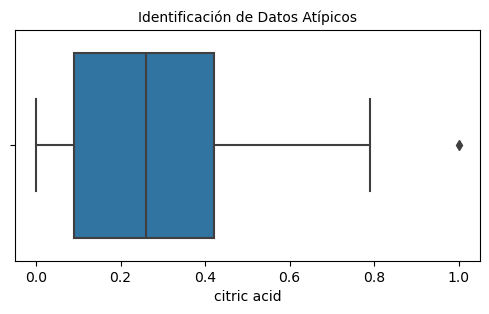

In [5]:
## Reprocesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['citric acid'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

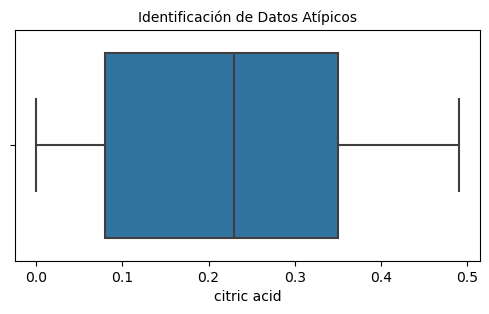

In [6]:
## Omitiendo datos atipicos del valor de acido del vino, que debe estar entre 0 y 0,5
value_max = 0.5
data_jmojica=data_jmojica[(data_jmojica['citric acid']<value_max)]

## Reprocesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['citric acid'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

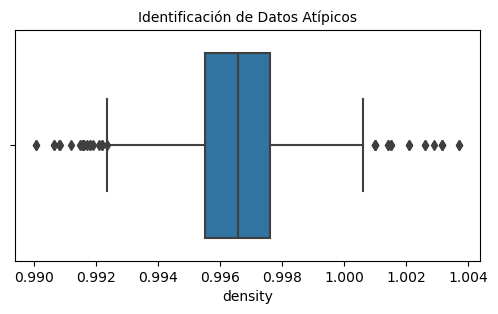

In [7]:
## Reprocesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['density'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

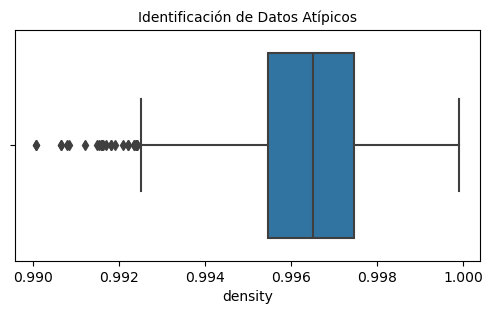

In [8]:
## Omitiendo datos atipicos de la densidad del vino, que debe estar entre 0.99 y 1
dvalue_min = 0.9
dvalue_max = 1
data_jmojica=data_jmojica[(data_jmojica['density']<dvalue_min)|(data_jmojica['density']<dvalue_max)]

## Reprocesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['density'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [9]:
data_jmojica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1347 non-null   float64
 1   volatile acidity      1347 non-null   float64
 2   citric acid           1347 non-null   float64
 3   residual sugar        1347 non-null   float64
 4   chlorides             1347 non-null   float64
 5   free sulfur dioxide   1347 non-null   float64
 6   total sulfur dioxide  1347 non-null   float64
 7   density               1347 non-null   float64
 8   pH                    1347 non-null   float64
 9   sulphates             1347 non-null   float64
 10  alcohol               1347 non-null   float64
 11  quality               1347 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 136.8 KB


(array([  9.,   0.,  48.,   0., 595.,   0., 535.,   0., 149.,  11.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

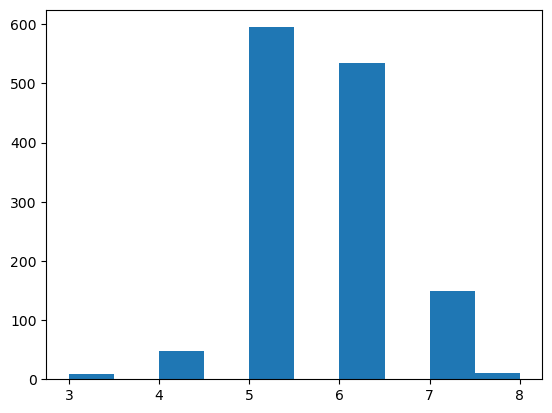

In [10]:
## Muestra histograma
plt.hist(data_jmojica.quality)

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

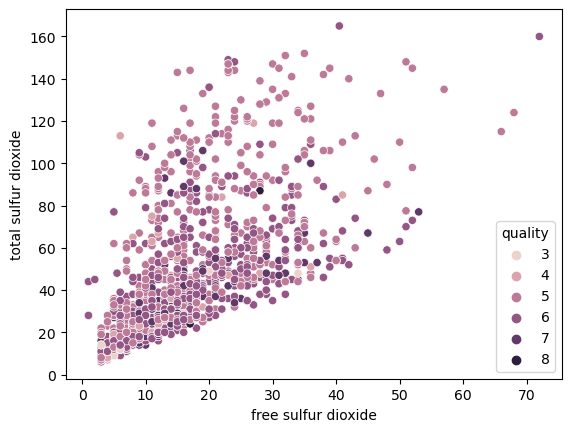

In [12]:
sns.scatterplot(x = "free sulfur dioxide", y = "total sulfur dioxide", hue = "quality", data = data_jmojica)

In [13]:
predictors_col = ["free sulfur dioxide", "total sulfur dioxide"]
target_col = ['quality']

predictors = data_jmojica [predictors_col]
target = data_jmojica [target_col]

predictors

,free sulfur dioxide,total sulfur dioxide
0,11.0,34.0
1,25.0,67.0
2,15.0,54.0
4,11.0,34.0
5,13.0,40.0
...,...,...
1594,32.0,44.0
1595,39.0,51.0
1596,29.0,40.0
1597,32.0,44.0


In [14]:
corr = predictors.corr()
corr

,free sulfur dioxide,total sulfur dioxide
free sulfur dioxide,1.000000,0.650642
total sulfur dioxide,0.650642,1.000000


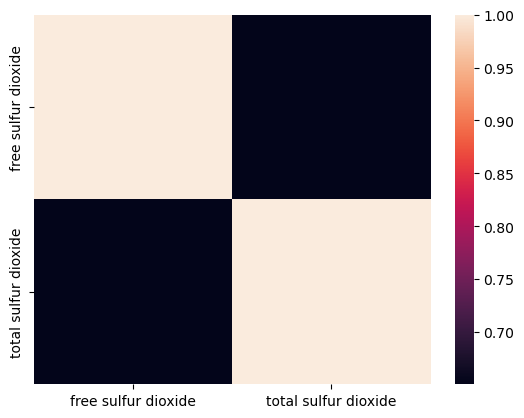

In [15]:
sns.heatmap(corr)
plt.show()

[Text(0.6181461024554196, 0.98, 'x[1] <= 82.5\ngini = 0.633\nsamples = 1077\nvalue = [6, 44, 469, 437, 111, 10]'),
 Text(0.2936486391710039, 0.94, 'x[1] <= 19.5\ngini = 0.643\nsamples = 910\nvalue = [6, 42, 345, 405, 104, 8]'),
 Text(0.10212466815704904, 0.9, 'x[1] <= 13.5\ngini = 0.704\nsamples = 215\nvalue = [4, 18, 60, 91, 38, 4]'),
 Text(0.05477155232639374, 0.86, 'x[0] <= 5.5\ngini = 0.748\nsamples = 100\nvalue = [2, 12, 31, 31, 21, 3]'),
 Text(0.032415816682967724, 0.82, 'x[1] <= 10.5\ngini = 0.735\nsamples = 65\nvalue = [0, 9, 24, 17, 13, 2]'),
 Text(0.016207908341483862, 0.78, 'x[1] <= 6.5\ngini = 0.74\nsamples = 30\nvalue = [0, 5, 8, 9, 8, 0]'),
 Text(0.01397233477714126, 0.74, 'gini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.018443481905826464, 0.74, 'x[1] <= 8.5\ngini = 0.741\nsamples = 27\nvalue = [0, 5, 6, 8, 8, 0]'),
 Text(0.008942294257370406, 0.7, 'x[0] <= 3.5\ngini = 0.7\nsamples = 10\nvalue = [0, 3, 2, 1, 4, 0]'),
 Text(0.004471147128685203, 0.66, 'x[

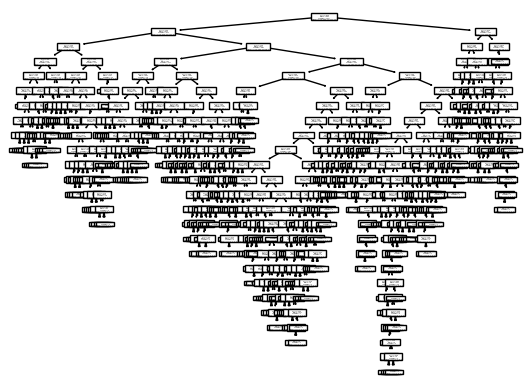

In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)
tree = DecisionTreeClassifier()

arbol = tree.fit(X_train, y_train)
 
plot_tree(arbol)

In [17]:
predicciones = arbol.predict(X_test)
 
predicciones

array([5, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6,
       5, 5, 5, 4, 6, 5, 6, 6, 5, 6, 6, 5, 5, 7, 6, 7, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 8, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 7, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       7, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 4, 5,
       5, 5, 3, 4, 6, 6, 4, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 5,
       6, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5,
       7, 6, 6, 5, 5, 5, 4, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 3, 5, 6, 6, 4, 5, 6, 6, 5, 5, 6, 7, 6,
       7, 4, 4, 5, 5, 5], dtype=int64)

In [18]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,1,0,1,1,0
4,0,0,2,2,0,0
5,0,4,84,31,6,1
6,1,3,38,54,2,0
7,1,0,10,20,7,0
8,0,0,0,1,0,0


In [19]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5370370370370371